In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.signal as sigs
import numpy as np
import cmdstanpy ## import stan interface for Python
import os
import seaborn as sns
import pandas as pd
from importlib import reload 
import sys
sys.path.append("..")
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
from statannotations.Annotator import Annotator
from itertools import product

tex_fonts = {
    # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.grid": True,
    'grid.color': '#DDDDDD',
    'grid.linestyle': '-',
    'grid.linewidth': 0.3,
    "lines.markersize":5,
    "lines.markeredgewidth":1,
    'axes.axisbelow':True,
    'pdf.fonttype':42,
    'axes.linewidth':0.5,
        'xtick.major.width':0.5,
    'ytick.major.width':0.5,
    'ytick.minor.width':0.3,

    'ytick.major.pad':0.2,
        "xtick.major.size":3,
    "ytick.major.size":3,
}

plt.rcParams.update(tex_fonts)

if os.name == "nt": ## adds compiler to path in Windows
    cmdstanpy.utils.cxx_toolchain_path() 
    
%config InlineBackend.close_figures=False # keep figures open in pyplot
#%config InlineBackend.print_figure_kwargs = {'bbox_inches':"tight", 'pad_inches':2}

np.random.seed(2101)


ratio= 2/(1+np.sqrt(5))

width = 520.344

kwags = {"wspace":0.2}

my_pal = {"4cm": "g", 
          "4em": "m", 
          "donor":"#a4e0ef", 
          "host":"#ff7f0e",
         "WT":"#02feff",
         "Young CHIM":"#7d81fc",
         "Old CHIM":"#f50aff"}

my_marks = {"donor": "o", 
           "host": "X",
         "WT":"o",
         "Young CHIM":"P",
         "Old CHIM":"^"}

scatterkwags = {"palette": my_pal,
                  "markers":my_marks,
                  'edgecolor':"k",
}


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    #golden_ratio = (5**.5 - 1) / 2
    golden_ratio = 1

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

#loading dataframes for parameters and data
df_para = pd.read_csv('/home/elise/Code/BRDU/parameters_est.csv')
df = pd.read_csv('/home/elise/Code/BRDU/Elisehasbeenusing_dataUCL.csv',index_col='index')
df['age_cat']=np.where(df.age < 114, 'wt', pd.np.where((df.age >= 114) & (df.age < 180), 'Young', 'Old'))

def enumerated_product(*args):
    yield from zip(product(*(range(len(x)) for x in args)), product(*args))

def myMAP(data):
    

    arrayed = data.to_numpy()
    nparam_density = sts.kde.gaussian_kde(arrayed)
    x = np.linspace(np.min(arrayed), np.max(arrayed), 2000)
    nparam_density = nparam_density(x)

    return x[np.argsort(nparam_density)[-1]]

In [2]:
youngfile = '/opt/mesh/tiree/elise/samples_1/youngmice_r18/stan-cache-'
oldfile = '/opt/mesh/tiree/elise/samples_1/oldmice_r25/stan-cache-'

ADHc = ['host','donor']
populationc = ['4cm','4em']
agec = ['Young','Old']

parnames_l = ["alpha_A","alpha_B","delta_A","delta_B", "gamma"] 
pretty_parnames_l = ["$\\alpha_A$","$\\alpha_B$","$\\delta_A$", "$\\delta_B$", "$\\gamma$"] #

parnames_b = ["alpha_A","alpha_B","delta_A","delta_B","mu","eff","fs"] 
pretty_parnames_b = ["$\\alpha_A$","$\\alpha_B$","$\\delta_A$", "$\\delta_B$","$\\mu$","$\\epsilon$","fs"] #



linearrealold-20230912111553_5.csv
branchedrealold-20230912111553_3.csv
branchedrealold-20230912111553_2.csv
linearrealold-20230912111553_4.csv
branchedrealold-20230912111553_4.csv
linearrealold-20230912111553_2.csv
linearrealold-20230912111553_3.csv
linearrealold-20230912111553_1.csv
branchedrealold-20230912111553_1.csv
branchedrealold-20230912111553_5.csv
('host', '4cm', 'Young', 0, 0, 0)
linearrealold-20230912111553_5.csv
branchedrealold-20230912111553_3.csv
branchedrealold-20230912111553_2.csv
linearrealold-20230912111553_4.csv
branchedrealold-20230912111553_4.csv
linearrealold-20230912111553_2.csv
linearrealold-20230912111553_3.csv
linearrealold-20230912111553_1.csv
branchedrealold-20230912111553_1.csv
branchedrealold-20230912111553_5.csv
('host', '4cm', 'Old', 0, 0, 1)
linearrealold-20230912111620_5.csv
branchedrealold-20230912111620_4.csv
linearrealold-20230912111620_4.csv
branchedrealold-20230912111620_1.csv
branchedrealold-20230912111620_3.csv
linearrealold-20230912111620_2.cs

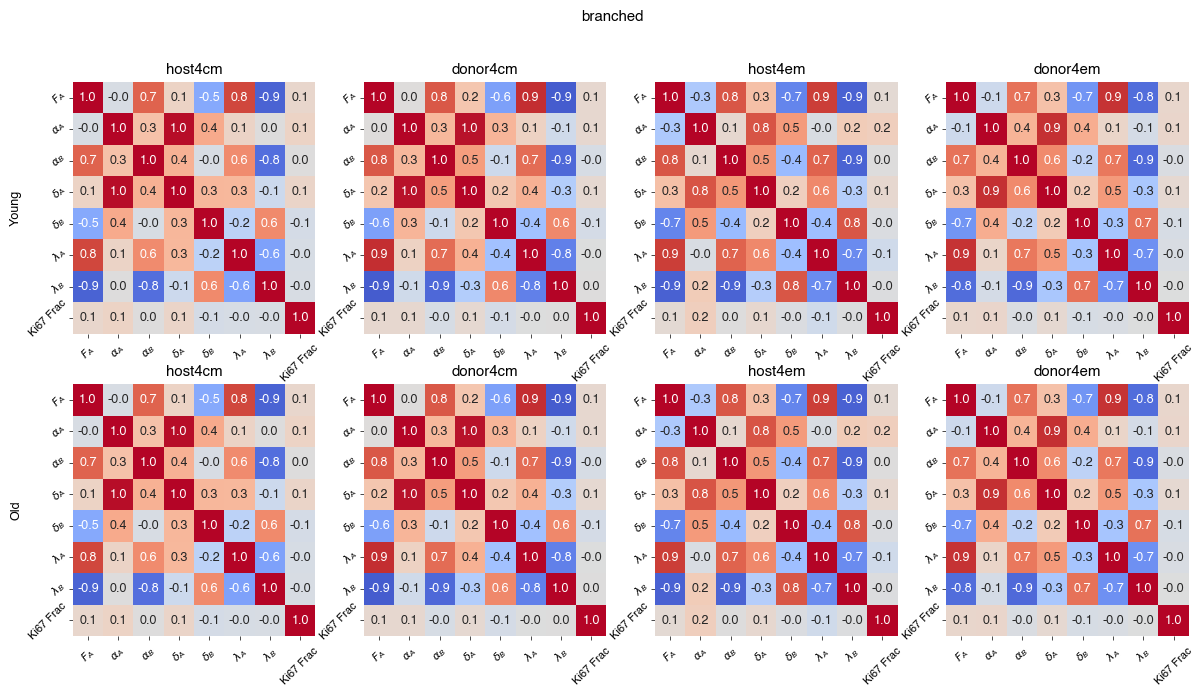

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(2*7.2,7.2))


type_i = "branched"


for idx, adhpop in enumerated_product(ADHc,populationc, agec):
    
    fl = []
    fb = []
    
    #data slicing and manulipulation
    if adhpop[2]=='Young CHIM':
        location = youngfile+adhpop[1]+adhpop[0]+'_1/'
    else:
        location = oldfile+adhpop[1]+adhpop[0]+'_1/'

    sys.path.insert(1, location)
    import paras
    reload(paras)

    for f_name in os.listdir(location):
        if f_name.endswith('.csv')&f_name.startswith('branched'):
            print(f_name)
            fb.append(location+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('linear'):
            print(f_name)
            fl.append(location+f_name)

    sam_fb = cmdstanpy.from_csv(fb)
    sam_fl = cmdstanpy.from_csv(fl)
            
    
    if type_i== "linear":
        
        parests = [sam_fl.stan_variable(pn) for pn in parnames_l]
        k_hat_fl =  sam_fl.stan_variable("k_hat")
        kihi_fl =  sam_fl.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_l)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["fs"]=0
        df["S_B"] = df["$\\gamma$"]*np.mean(np.sum(k_hat_fl[:,:,0:paras.switch],axis=2), axis=1)
        df['Source']=np.random.normal(paras.SourceL,0.001, len(k_hat_fl))

        df["S_A"] = df["Source"]
        df['f']=np.mean(np.sum(k_hat_fl[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fl[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fl[:,:,:],axis=2), axis=1)
        df['Kihi Frac'] = np.mean(kihi_fl,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fl[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fl[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']

    
    else:
        parests = [sam_fb.stan_variable(pn) for pn in parnames_b]
        k_hat_fb =  sam_fb.stan_variable("k_hat")
        kihi_fb =  sam_fb.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_b)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["ratio_lambda"] = df["$\\lambda_A$"]/df["$\\lambda_A$"]
        df['Source']=np.random.normal(paras.SourceB,0.001, len(k_hat_fb))
        df["$F_A$"] = (df["fs"])
        df["p_AB"] = 0
        df['f']=np.mean(np.sum(k_hat_fb[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['Ki67 Frac'] = np.mean(kihi_fb,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fb[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fb[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df["calc_fract"] = 1/(((1-df["fs"])/df["fs"])*df["ratio_lambda"] +1)


    df=df[["$F_A$","$\\alpha_A$","$\\alpha_B$","$\\delta_A$", "$\\delta_B$","$\\lambda_A$", "$\\lambda_B$","Ki67 Frac"]]
    sns.heatmap(df.corr(), cbar=False,annot = True, fmt='.1f',cmap= 'coolwarm',vmin=-1, vmax=1, ax=axes[idx[2],(idx[0]+2*idx[1])])
    axes[idx[2],(idx[0]+2*idx[1])].set_title(adhpop[0]+adhpop[1])
    plt.sca(axes[idx[2],(idx[0]+2*idx[1])])
    plt.xticks(rotation=45) 
    plt.yticks(rotation=45) 
    
axes[0,0].set_ylabel('Young')
axes[1,0].set_ylabel('Old')

fig.suptitle(type_i)

fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/figS5_'+type_i+'.pdf', dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

# fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/fig4bpng.png', dpi='figure', format='png',
#         bbox_inches='tight', pad_inches=0.1)

linearrealold-20230912111553_5.csv
branchedrealold-20230912111553_3.csv
branchedrealold-20230912111553_2.csv
linearrealold-20230912111553_4.csv
branchedrealold-20230912111553_4.csv
linearrealold-20230912111553_2.csv
linearrealold-20230912111553_3.csv
linearrealold-20230912111553_1.csv
branchedrealold-20230912111553_1.csv
branchedrealold-20230912111553_5.csv
('host', '4cm', 'Young', 0, 0, 0)
linearrealold-20230912111553_5.csv
branchedrealold-20230912111553_3.csv
branchedrealold-20230912111553_2.csv
linearrealold-20230912111553_4.csv
branchedrealold-20230912111553_4.csv
linearrealold-20230912111553_2.csv
linearrealold-20230912111553_3.csv
linearrealold-20230912111553_1.csv
branchedrealold-20230912111553_1.csv
branchedrealold-20230912111553_5.csv
('host', '4cm', 'Old', 0, 0, 1)
linearrealold-20230912111620_5.csv
branchedrealold-20230912111620_4.csv
linearrealold-20230912111620_4.csv
branchedrealold-20230912111620_1.csv
branchedrealold-20230912111620_3.csv
linearrealold-20230912111620_2.cs

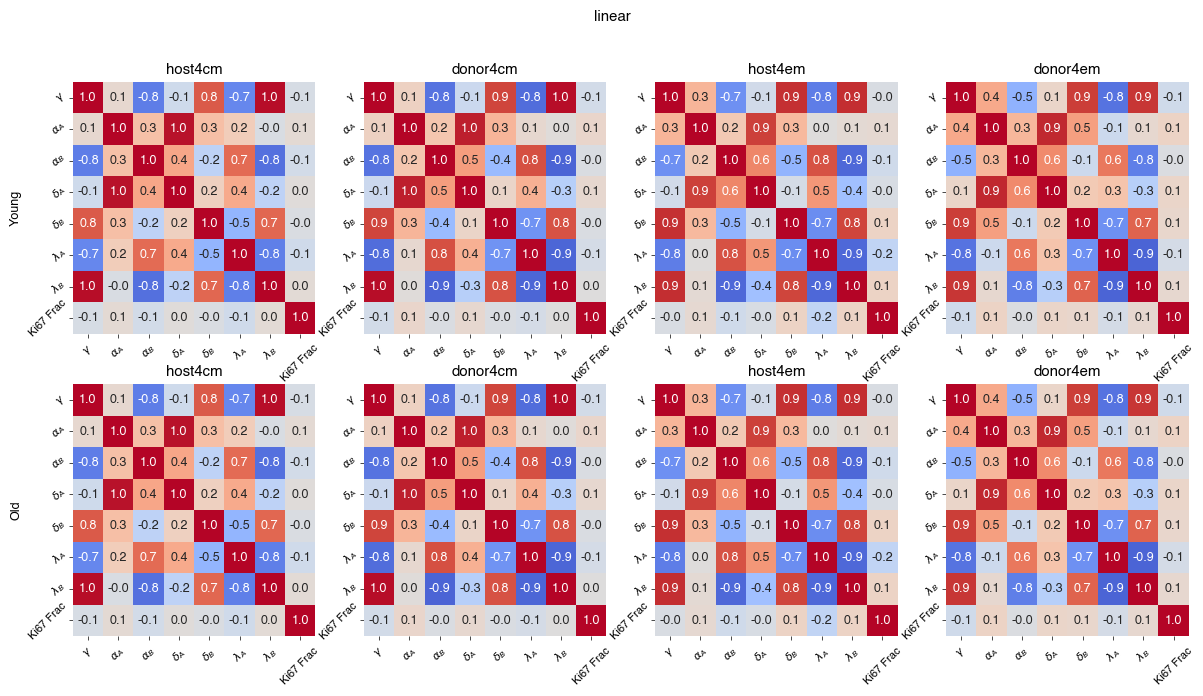

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(2*7.2,7.2))


type_i = "linear"


for idx, adhpop in enumerated_product(ADHc,populationc, agec):
    
    fl = []
    fb = []
    
    #data slicing and manulipulation
    if adhpop[2]=='Young CHIM':
        location = youngfile+adhpop[1]+adhpop[0]+'_1/'
    else:
        location = oldfile+adhpop[1]+adhpop[0]+'_1/'

    sys.path.insert(1, location)
    import paras
    reload(paras)

    for f_name in os.listdir(location):
        if f_name.endswith('.csv')&f_name.startswith('branched'):
            print(f_name)
            fb.append(location+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('linear'):
            print(f_name)
            fl.append(location+f_name)

    sam_fb = cmdstanpy.from_csv(fb)
    sam_fl = cmdstanpy.from_csv(fl)
            
    
    if type_i== "linear":
        
        parests = [sam_fl.stan_variable(pn) for pn in parnames_l]
        k_hat_fl =  sam_fl.stan_variable("k_hat")
        kihi_fl =  sam_fl.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_l)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["fs"]=0
        df["S_B"] = df["$\\gamma$"]*np.mean(np.sum(k_hat_fl[:,:,0:paras.switch],axis=2), axis=1)
        df['Source']=np.random.normal(paras.SourceL,0.001, len(k_hat_fl))

        df["S_A"] = df["Source"]
        df['f']=np.mean(np.sum(k_hat_fl[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fl[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fl[:,:,:],axis=2), axis=1)
        df['Ki67 Frac'] = np.mean(kihi_fl,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fl[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fl[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']

    
    else:
        parests = [sam_fb.stan_variable(pn) for pn in parnames_b]
        k_hat_fb =  sam_fb.stan_variable("k_hat")
        kihi_fb =  sam_fb.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_b)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["ratio_lambda"] = df["$\\lambda_A$"]/df["$\\lambda_A$"]
        df['Source']=np.random.normal(paras.SourceB,0.001, len(k_hat_fb))
        df["$F_A$"] = (df["fs"])
        df["p_AB"] = 0
        df['f']=np.mean(np.sum(k_hat_fb[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['Ki67 Frac'] = np.mean(kihi_fb,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fb[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fb[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df["calc_fract"] = 1/(((1-df["fs"])/df["fs"])*df["ratio_lambda"] +1)


    df=df[["$\\gamma$","$\\alpha_A$","$\\alpha_B$","$\\delta_A$", "$\\delta_B$","$\\lambda_A$", "$\\lambda_B$","Ki67 Frac"]]
    sns.heatmap(df.corr(), cbar=False,annot = True, fmt='.1f',cmap= 'coolwarm',vmin=-1, vmax=1, ax=axes[idx[2],(idx[0]+2*idx[1])])
    axes[idx[2],(idx[0]+2*idx[1])].set_title(adhpop[0]+adhpop[1])
    plt.sca(axes[idx[2],(idx[0]+2*idx[1])])
    plt.xticks(rotation=45) 
    plt.yticks(rotation=45) 
    
axes[0,0].set_ylabel('Young')
axes[1,0].set_ylabel('Old')

fig.suptitle(type_i)

fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/figS5_'+type_i+'.pdf', dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

# fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/fig4bpng.png', dpi='figure', format='png',
#         bbox_inches='tight', pad_inches=0.1)

branched-20240418183004_5.csv
burst-20240418183005_5.csv
burst-20240418183005_2.csv
branched-20240418183004_4.csv
linear-20240418182857_1.csv
branched-20240418183004_2.csv
branched-20240418183004_1.csv
linear-20240418182857_4.csv
linear-20240418182857_3.csv
burst-20240418183005_4.csv
branched-20240418183004_3.csv
burst-20240418183005_1.csv
linear-20240418182857_2.csv
burst-20240418183005_3.csv
linear-20240418182857_5.csv
('host', '4cm', 'Young', 0, 0, 0)
branched-20240418183004_5.csv
burst-20240418183005_5.csv
burst-20240418183005_2.csv
branched-20240418183004_4.csv
linear-20240418182857_1.csv
branched-20240418183004_2.csv
branched-20240418183004_1.csv
linear-20240418182857_4.csv
linear-20240418182857_3.csv
burst-20240418183005_4.csv
branched-20240418183004_3.csv
burst-20240418183005_1.csv
linear-20240418182857_2.csv
burst-20240418183005_3.csv
linear-20240418182857_5.csv
('host', '4cm', 'Old', 0, 0, 1)
burst-20240418183034_4.csv
branched-20240418183034_2.csv
burst-20240418183034_5.csv


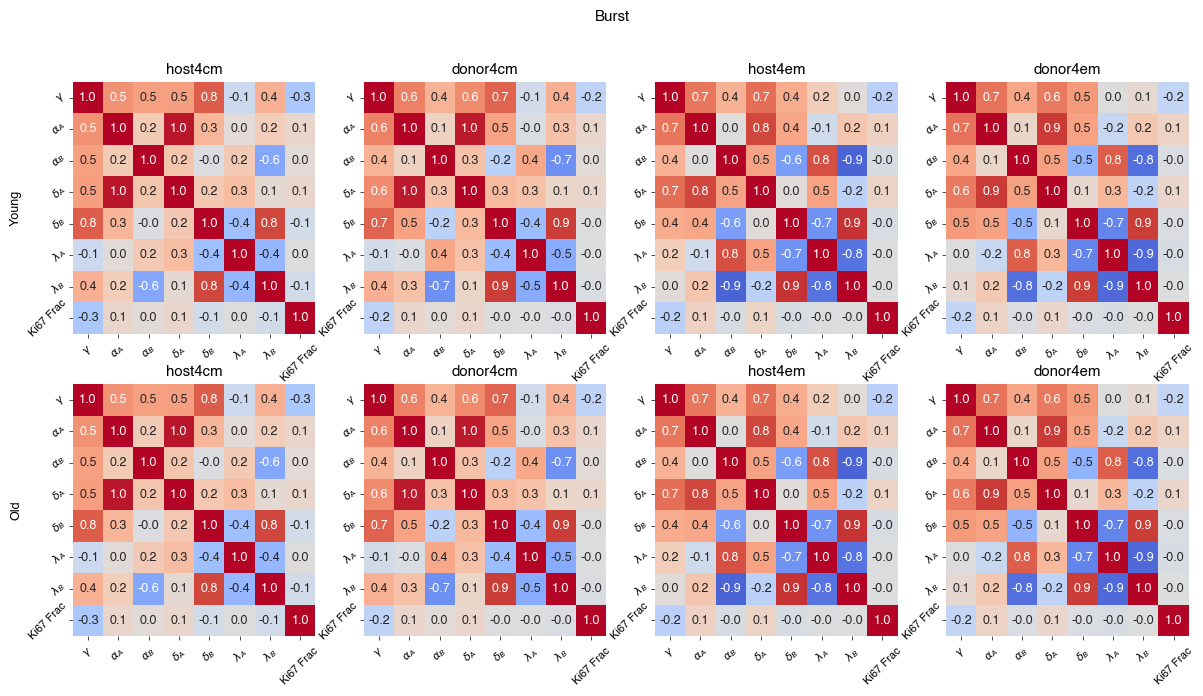

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(2*7.2,7.2))


type_i = "burst"
youngfile = '/opt/mesh/tiree/elise/samples_1/youngmice_r19/stan-cache-'
oldfile = '/opt/mesh/tiree/elise/samples_1/oldmice_r26/stan-cache-'


for idx, adhpop in enumerated_product(ADHc,populationc, agec):
    
    fl = []
    fb = []
    fs = []
    
    #data slicing and manulipulation
    if adhpop[2]=='Young CHIM':
        location = youngfile+adhpop[1]+adhpop[0]+'_1/'
    else:
        location = oldfile+adhpop[1]+adhpop[0]+'_1/'

    sys.path.insert(1, location)
    import paras
    reload(paras)

    for f_name in os.listdir(location):
        if f_name.endswith('.csv')&f_name.startswith('branched'):
            print(f_name)
            fb.append(location+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('linear'):
            print(f_name)
            fl.append(location+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('burst'):
            print(f_name)
            fs.append(location+f_name)

    sam_fs = cmdstanpy.from_csv(fs)
            
    
    if type_i== "burst":
        
        parests = [sam_fs.stan_variable(pn) for pn in parnames_l]
        k_hat_fs =  sam_fs.stan_variable("k_hat")
        kihi_fs =  sam_fs.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_l)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["fs"]=0
        df["S_B"] = df["$\\gamma$"]*np.mean(np.sum(k_hat_fs[:,:,0:paras.switch],axis=2), axis=1)
        df['Source']=np.random.normal(paras.SourceL,0.001, len(k_hat_fs))

        df["S_A"] = df["Source"]
        df['f']=np.mean(np.sum(k_hat_fs[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fs[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fs[:,:,:],axis=2), axis=1)
        df['Ki67 Frac'] = np.mean(kihi_fs,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fs[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fs[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']

    
    else:
        parests = [sam_fb.stan_variable(pn) for pn in parnames_b]
        k_hat_fb =  sam_fb.stan_variable("k_hat")
        kihi_fb =  sam_fb.stan_variable("f_kihi_calc")

        print(adhpop + idx)
        df = pd.DataFrame(np.transpose(parests) ,columns=pretty_parnames_b)

        df["$\\lambda_A$"] = df["$\\delta_A$"]-df["$\\alpha_A$"]
        df["$\\lambda_B$"] = df["$\\delta_B$"]-df["$\\alpha_B$"]
        df["ratio_lambda"] = df["$\\lambda_A$"]/df["$\\lambda_A$"]
        df['Source']=np.random.normal(paras.SourceB,0.001, len(k_hat_fb))
        df["$F_A$"] = (df["fs"])
        df["p_AB"] = 0
        df['f']=np.mean(np.sum(k_hat_fb[:,:,0:paras.switch],axis=2), axis=1)/np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['TotalCount']=np.mean(np.sum(k_hat_fb[:,:,:],axis=2), axis=1)
        df['Ki67 Frac'] = np.mean(kihi_fb,axis=1)
        df['KihiFracinFast'] =np.mean(np.sum(k_hat_fb[:,:,:((2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df['KihiFracinSlow'] =np.mean(np.sum(k_hat_fb[:,:,(paras.switch):(paras.switch+(2+paras.numofbrduint)*(1+paras.numofki67int))],axis=2),axis=1)/df['TotalCount']
        df["calc_fract"] = 1/(((1-df["fs"])/df["fs"])*df["ratio_lambda"] +1)


    df=df[["$\\gamma$","$\\alpha_A$","$\\alpha_B$","$\\delta_A$", "$\\delta_B$","$\\lambda_A$", "$\\lambda_B$","Ki67 Frac"]]
    sns.heatmap(df.corr(), cbar=False,annot = True, fmt='.1f',cmap= 'coolwarm',vmin=-1, vmax=1, ax=axes[idx[2],(idx[0]+2*idx[1])])
    axes[idx[2],(idx[0]+2*idx[1])].set_title(adhpop[0]+adhpop[1])
    plt.sca(axes[idx[2],(idx[0]+2*idx[1])])
    plt.xticks(rotation=45) 
    plt.yticks(rotation=45) 
    
axes[0,0].set_ylabel('Young')
axes[1,0].set_ylabel('Old')

fig.suptitle("Burst")

fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/figS5_burst.pdf', dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

# fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/fig4bpng.png', dpi='figure', format='png',
#         bbox_inches='tight', pad_inches=0.1)